## Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации.  
Цели исследования: 
- изучить рынок российского кинопроката.
- выявить текущие тренды. 
- рассмотреть  фильмы, которые получили государственную поддержку. 
- выяснить насколько такие фильмы интересны зрителю.  

Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. Данные, опубликованными на портале открытых данных Министерства культуры. 

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import numpy
import plotly.express as px

In [2]:
movies = pd.read_csv('/datasets/mkrf_movies.csv')
movies = movies.reset_index(drop=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format) # v1.
display(movies.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [3]:
shows = pd.read_csv('/datasets/mkrf_shows.csv')
shows = shows.reset_index(drop=True)
pd.set_option('display.max_columns', None)
display(shows.head())

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


In [4]:
movies.info()
print('----------')
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [5]:
movies.shape

(7486, 15)

In [6]:
shows.shape

(3158, 2)

In [7]:
shows['box_office'].isna().sum()

0

In [8]:
print(np.isnan(shows['box_office']).sum())

0


Объеденим два датафрейма по столбцу puNumber, предварительно сделав у них одинаковый тип данных. 

In [9]:
#movies['puNumber'] = movies['puNumber'].astype(int)
# преобращование невозможно т.к. есть значение которое не может быть интерпретировано как число.

Выведем все строки со значения в столбце puNumber что не являются цифрами.

In [10]:
movies[~movies['puNumber'].str.isdigit()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Заменим значение в строке 1797 'нет' на '0'.

In [11]:
movies['puNumber'] = movies['puNumber'].replace('нет', '0')

In [12]:
#movies['puNumber'] = movies.loc[804, 'puNumber'].strip()

In [13]:
#movies[~movies['puNumber'].str.isdigit()]
# проверил все ли верно сработало.

In [14]:
# Теперь можно преобразовать данные.
movies['puNumber'] = movies['puNumber'].astype('int')

Объедения датафреймы

In [15]:
data = movies.merge(shows, on = 'puNumber', how='left', indicator=True)
data = data.reset_index(drop=True)
data.columns

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office', '_merge'],
      dtype='object')

При выполнении левого соединения с помощью параметра indicator = True создал служебный столбец _merge, в котором указано, в каком из датафреймов присутствует каждая строка.

In [16]:
data['_merge'].value_counts()

left_only     4328
both          3158
right_only       0
Name: _merge, dtype: int64

In [17]:
data.drop(labels = '_merge', axis = 1, inplace = True)

In [18]:
#data.info()

По столбцу _merge видим, что объекты в количестве 3158 из датфрейма shows присутствуют в смерженом data. Вызвав метод info() к data видим, что число объектов в box_office так же равно 3158.  
Все объекты из датафрейма mkrf_movies вошли в смерженный data.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

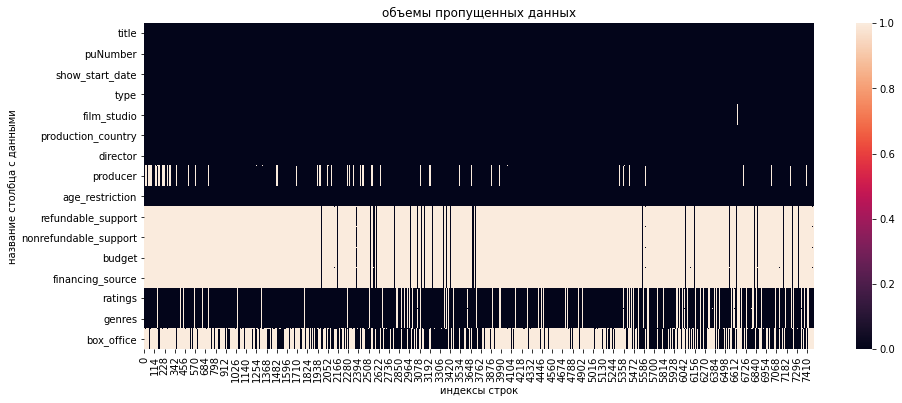

In [19]:
plt.figure(figsize=(15, 6))
sns.heatmap(data.isna().transpose())
plt.title('объемы пропущенных данных')
plt.xlabel('индексы строк')
plt.ylabel('название столбца с данными')
plt.show()
# Построил хитмап, по пропущенным значениям.

In [20]:
for col in data.columns:
    print(f'{col}: {data[col].isna().sum() / data.shape[0] * 100:.2f}%')
# посчитал процент отсутствующих значений по каждой колонке.

title: 0.00%
puNumber: 0.00%
show_start_date: 0.00%
type: 0.00%
film_studio: 0.24%
production_country: 0.03%
director: 0.12%
producer: 7.59%
age_restriction: 0.00%
refundable_support: 95.57%
nonrefundable_support: 95.57%
budget: 95.57%
financing_source: 95.57%
ratings: 12.92%
genres: 13.04%
box_office: 57.81%


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [22]:
data.duplicated().sum()

0

In [23]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

#### Изучим столбец show_start_date

В столбце show_start_date находится дата и время, нужно изменить тип данных 

In [24]:
data['show_start_date'] = (
    pd.to_datetime(data['show_start_date'],
                   format='%Y-%m-%dT%H:%M:%S')
)

In [25]:
#data.show_start_date.value_counts(dropna=False)

#### Изучим столбец ratings

Данных с рейтингом необходимо перевести в тип float, так же есть рейтинг в процентном значении.

In [26]:
#data['ratings'].unique()

In [27]:
data['ratings'] = data['ratings'].replace('%', '', regex = True)
data['ratings']= data['ratings'].astype('float64') 
data.loc[data['ratings'] > 10, 'ratings'] = data['ratings']/10
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

В столбце ratings пропущенно 12.92% данных, это много, удалить их нельзя так как такой большой объем может повлиять на дальнейшее исследование. Оставим все как есть.

#### Изучим столбец title

In [28]:
data['title'].value_counts(dropna=False)

День святого Валентина_            5
Белоснежка и охотник               4
Жена путешественника во времени    4
Химера                             4
Красавчик-2                        4
                                  ..
Недруги                            1
Джокер                             1
Три метра над уровнем неба         1
Все могу                           1
Жил-был Дэдпул                     1
Name: title, Length: 6772, dtype: int64

In [29]:
#data['title'].unique()

#### Изучим столбец puNumber

In [30]:
#data['puNumber'].unique()

In [31]:
data['puNumber'].value_counts(dropna=False)

221054410    2
221154310    2
0            1
111008518    1
114002716    1
            ..
121021814    1
224028210    1
121013618    1
121017712    1
126002916    1
Name: puNumber, Length: 7484, dtype: int64

In [32]:
# Проверим сколько дубликатов в столбце
data['puNumber'].duplicated().sum()

2

In [33]:
# Датафрейм содержит всего 2 дубликата - посмотрим на них:
data[data.duplicated(subset=['puNumber'], keep = False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


In [34]:
# Удалим дубликаты.
data = data.drop(index=[4639, 5067])
data = data.reset_index(drop=True)

In [35]:
data['puNumber'].duplicated().sum()

0

Так же у нас есть строка с нулевым значеним в столбце puNumber

In [36]:
data[data.puNumber == 0]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1797,Курбан-роман. (История с жертвой),0,2014-05-15 12:00:00+00:00,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Здесь заменим в строке с индексом 1797, 0 на значение на 100000000.

In [37]:
data['puNumber'] = data['puNumber'].replace(0, 100000000, regex = True)

In [38]:
# Проверим как все сработало
#data.iloc[[1797]]

In [39]:
# Переименуем столбец
data = data.rename(columns={'puNumber':'pu_number'})
#data.head()

#### Изучим столбец film_studio

In [40]:
data.film_studio.unique()
#data.film_studio.value_counts(dropna=False)

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

In [41]:
# Удалим ненужные пробелы
data['film_studio'] = data['film_studio'].str.strip()

In [42]:
# Удалим данные с пропусками
data = data.dropna(subset=['film_studio'])

In [43]:
# Проверим все ли верно сработало 
data.film_studio.value_counts(dropna=False)

Киностудия "Мосфильм"                                                           345
ООО "Мульт в кино"                                                               75
Анимаккорд Лтд                                                                   23
ООО "ТаББаК"                                                                     18
ФГУП "ТПО "Киностудия "Союзмультфильм"                                           16
                                                                               ... 
Михалкова-Кончаловская Наталия Андреевна                                          1
Аннапурна Пикчерз, Дэвис Интертейнмент, Фокс 2000                                 1
Лабиринт Фильм                                                                    1
Арч Стоун, Логолайт Интертейнмент, Соффер, Имаджинейтинг Пикчерз                  1
Би-Би-Си, Бэби Коу Продакшнз, Бритиш Филм Институт, Магнолиа Мэй Филмз, Патэ      1
Name: film_studio, Length: 5462, dtype: int64

#### Изучим столбец production_country

В столбце production_country отсутствует одно значение, выведем его.

In [44]:
data[data.production_country.isnull()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия","194,527.00"


Посмотрим на другие фильмы студии ЕРАЛАШ

In [45]:
#data[data['film_studio'] == 'ООО "Продюсерский центр ЕРАЛАШ"']

Видим что все эти фильмы производились в России, так что заполнил пустое значение на "Россия".

In [46]:
data['production_country'] = data['production_country'].fillna('Россия')

In [47]:
# Проверим все ли верно сработало
data.iloc[[3186]]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3187,В центре внимания,121003116,2016-02-11 12:00:00+00:00,Художественный,"Анонимус Контент, Фёст Лук Медиа, Партисипэнт ...",США,Том МакКарти,"Стив Голин, Николь Роклин, Блай Пэгон Фауст",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.50,"драма,криминал,биография","10,251,855.50"


In [48]:
#data['production_country'].unique()

Большое количество стран производителей пишется через '-', приведем их к однообразному виду.

In [49]:
data['production_country'] = data['production_country'].dropna().apply(
    (lambda x: ', '.join([x.strip() for x in x.split('-')]))
)
data['production_country'].tail()

7479             Великобритания
7480                        США
7481                США, Канада
7482    Республика Кипр, Россия
7483    Республика Кипр, Россия
Name: production_country, dtype: object

In [50]:
#data['production_country'].unique()

#### Изучим столбец director

In [51]:
data['director'].isna().sum()

8

In [52]:
data[data.director.isnull()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,"44,350.00"
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.90,"концерт,музыка",NaN
4922,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4941,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.70,"концерт,музыка",NaN


In [53]:
data['director'] = data['director'].fillna('неизвестно')

In [54]:
# Проверим все ли работает
#data[data['director'] == 'неизвестно']

#### Изучим столбцы poducer, genres

In [55]:
#data[data.producer.isnull()]
#data[data.genres.isnull()]
#data['genres'].value_counts(dropna=False)
#data['producer'].value_counts(dropna=False)

В столбце genres 963 данных отсутствует, мы не можем удалить эти строчки так как это повлияет на дальнейшие исследования, запишем их как 'неизвестно'.  
В столбце producer отсутствует 567 данных, поступим аналогично столбцу genres. 

In [56]:
# С помощью цикла пройдемся по всем элементам списка из двух столбцов
# и заменим отсутствующие значения на 'неизвестно'.
change_list = ['producer', 'genres']
for i in change_list:
    data[i] = data[i].fillna('неизвестно')

In [57]:
# Комментарий ревьюера
temp = data.copy() # создаем копию датасета до преобразования
len(temp)

7466

In [58]:
data['genres'] = data['genres'].dropna().apply((
    lambda x: ', '.join([x.strip() for x in x.split(',')]))
)

In [59]:
# Проверил как все сработало
#data['genres'].unique()

#### Изучим столбец age_restriction

In [60]:
#data['age_restriction'].unique()
#data['age_restriction'].value_counts(dropna=False)
# С данными все впорядке идем дальше.и

#### Изучим столбцы refundable_support, nonrefundable_support, budget, financing_source

In [61]:
data['box_office'].value_counts(dropna=False)

NaN               4309
0.00                24
200.00              13
300.00              12
360.00               9
                  ... 
9,585,014.00         1
809,638,458.60       1
220,728.00           1
11,332,412.00        1
52,984,377.00        1
Name: box_office, Length: 2938, dtype: int64

In [62]:
data[data['box_office'] == 0.0]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
66,Анна Павлова,111011013,2013-12-19 12:00:00+00:00,Художественный,"совместное производство Киностудия ""Мосфильм"",...","СССР, Франция, Англия, Куба, ГДР",Эмиль Лотяну,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,"драма, биография, музыка",0.00
237,Подранки,111007613,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Н.Губенко,неизвестно,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.20,драма,0.00
596,Запах вереска,111003012,2012-05-23 12:00:00+00:00,Художественный,"ООО ""Студия РИМ""",Россия,А.Магомедов,"М.Балашова, Е.Миронов",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.30,комедия,0.00
914,В тумане /По одноименной повести Василя Быкова/,121027712,2012-11-07 12:00:00+00:00,Художественный,"Ма Йа Де Фикшн, Лемминг Филм, Беларусьфильм, Д...","Германия, Нидерланды, Беларусь, Россия, Латвия",Сергей Лозница,Хайно Декерт,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.50,"драма, военный, история",0.00
932,Письмо для Момо,124002912,2012-10-25 12:00:00+00:00,Анимационный,"Кадокава Пикчерз, Продакшнз И Джи, Токио Броад...",Япония,Окиура Хироюки,"Хироюки Икеда, Митсухиса Ишикава, Кацзуя Хамана",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.40,"аниме, мультфильм, драма",0.00
933,Летние войны,124002812,2012-10-25 12:00:00+00:00,Анимационный,"Медхауз, Ниппон Телевижн Нетуорк Корпорейшн, К...",Япония,Мамору Хосода,"Такафуми Ватанабэ, Такуя Ито, Сэйдзи Окуда, Юи...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.70,"аниме, мультфильм, фантастика",0.00
976,Гарегин Нжде,131000213,2013-04-23 12:00:00+00:00,Художественный,"Эй Джи Кей Продакшнз, Пан Армениан Медиа Групп",Армения,Грач Кешишян,Грач Кешишян,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.90,биография,0.00
1126,Марафон,111006712,2012-12-18 12:00:00+00:00,Художественный,"ООО ""Синема Арт Студио""",Россия,К.Оганесян,К.Оганесян,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.50,"комедия, мелодрама",0.00
1387,Экзамен для двоих /По роману Джин Ханфф Корелитц/,121014613,2013-06-11 12:00:00+00:00,Художественный,Депф оф Филд,США,Пол Вайц,"Пол Вайц, Керри Кохански, Эндрю Миано",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.80,"мелодрама, комедия, драма",0.00
1559,Последняя любовь мистера Моргана /По роману Фр...,121002614,2014-02-11 12:00:00+00:00,Художественный,"Камински Штим Фильм, Бавариа Пикчерз, Сенатор ...","Германия, Бельгия, США, Франция",Сандра Неттельбек,"Франк Камински, Астрид Камке, Филипп Кройцер, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.90,драма,0.00


Есть строки с нулевыми кассовыми сборами но с хорошими рейтингами. Можно предположить, что эти фильмы по тем или иным причинам не показали в назначеное время, по причине технических неисправностей или же каких то других проблем, а рейтинг самого фильма сформировался при других просмотрах, домашних к примеру. Все же лучше избавимся от них чтобы они не вводили в заблуждение, их немного и они не повлияют на дальнейшее исследование.

In [63]:
data = data[data.box_office != 0.0]

In [64]:
#data['box_office'].value_counts(dropna=False)

In [65]:
# Комментарий ревьюера
a, b = len(temp), len(data)
print(a, b, round((a-b)/a*100, 2))

7466 7442 0.32


#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

В колонках refundable_support, nonrefundable_support, budget, financing_source. Одинаковое количество пропусков что выглядит странно.

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7442 entries, 0 to 7483
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7442 non-null   object             
 1   pu_number              7442 non-null   int64              
 2   show_start_date        7442 non-null   datetime64[ns, UTC]
 3   type                   7442 non-null   object             
 4   film_studio            7442 non-null   object             
 5   production_country     7442 non-null   object             
 6   director               7442 non-null   object             
 7   producer               7442 non-null   object             
 8   age_restriction        7442 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

- В title с данными все впорядке.  
- В pu_number есть одно нулевое значение, так как значения в этом столбце уникальные, заменим его на значение 'нет'.   
- В film_studio отсутствуют данные в небольшом количестве, так как восстановить их невозможно удалим их.  
- В production_country было одно незаполненное значение, проверил этот же фильм но в других прокатах, заполнил аналогичным значением.
- В director 8 фильмов без указания режиссера, данные о режиссере не критичны, заменим пропуски на "неизвестно".  
- В producer, продюсер не указан для 567 фильмах - заменим пропуски на "неизвестно".  
- В refundable_support, nonrefundable_support, financing_source:только у 4% фильмов есть информация об источнике государственного финансирования и объёмах возвратных и невозвратных средств государственной поддержки. Получается, что данные фильмы не были профинансированы государством. Количество пропущенных значений одинаковы по данным столбцам, поэтомупропуски трогать не будем.  
- В budget 17 нулевых значений. В строках с нулевыми значениями по колонке budget, есть данные по колонкам nonrefundable_support(невозвратные средства) и refundable_support(возвратные средства) так же есть информация о источнике финансирования financing_source. Следовательно должен быть и бюджет. Присутствие в нем нулевых значений может появится из за некоректного вывода данных. Эти данные могу повлиять на дельнейшее исследование, так что удалим их.  
- В ratings для 967 фильмов рейтинги не указаны - возможно, для формирования рейтинга на Кинопоиске недостаточно оценок у фильмов, оставим пропуски, как есть.
- В genres 963 фильмов нет информации о жанре - заменим пропуски на "неизвестно", для дальнейших исследований, данные не потребуются.  
- box_office: 4309 записи о кассовых сборах не заполнены и 24 сбора нулевых.О нулевых сборах можно предположить, что эти фильмы по тем или иным причинам не показали в назначеное время, по причине технических неисправностей или же каких то других проблем, а рейтинг самого фильма сформировался при других просмотрах, домашних к примеру. Все же лучше избавимся от них чтобы они не вводили в заблуждение, их немного и они не повлияют на дальнейшее исследование. Проверим, в таблице movies после удаления неявного дубликата оставалось 7485 значений, в таблице shows 3158 значений, после объединения получилось 7485-3158=4327 не заполненных строки, то есть все имеющиеся строки в таблице shows мы использовали, других данных у нас нет, оставим пропуски, как есть.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [67]:
data.duplicated().sum()

0

pu_number было 2 дубликата. Под одним номером прокатного удостоверения числились два разных фильма с одной датой премьеры. Возможно сыграл человеческий фактор при заполнении какой-нибудь формы. Удалил дубликат по каждому случаю.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

#### Изучим столбец type

In [68]:
# В столбце есть ненужные пробелы, избавимся от них.
#data['type'].unique()
data['type'].value_counts(dropna=False)

Художественный                4494
 Художественный               1384
Анимационный                   826
Прочие                         406
Документальный                 280
Научно-популярный               50
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

In [69]:
# Удалим пробелы методом .strip()
data['type'] = data['type'].str.strip()

In [70]:
data['type'].value_counts(dropna=False)

Художественный                5878
Анимационный                   827
Прочие                         406
Документальный                 280
Научно-популярный               50
Музыкально-развлекательный       1
Name: type, dtype: int64

In [71]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

Проблемой в поле type было наличие лишних пробелы, которые встречаются в начале и в конце строки.
Исправили проблемные значения применив метод 

In [72]:
#data['genres'].value_counts()

In [73]:
#data['production_country'].value_counts()

In [74]:
#data['producer'].value_counts()

In [75]:
#data['director'].value_counts()

Также мы видим, что столбцы: страна происхождения, режиссер, продюссер, жанр, содержат множественные значения строк, в которых рекомендуют считать, что первое указанное значение и есть "главный" показатель. 
В дальнейших шагах будут созданы дополнительные столбецы с именем и фамилией главного режиссёра и основным жанром фильма исходя из первого значения строки.  
Определение главного продюссера фильмов в данном случае, тоже не представляет ценности для исследования, в основном их количество разнится от 1-3, и выделить из их числа того или иного создателя будет некорректным.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [76]:
# Проверим сводную статистику.
data.describe()

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office
count,"7,442.00",332.00,332.00,332.00,"6,492.00","3,133.00"
mean,"135,271,278.43","11,864,457.83","48,980,988.89","127,229,716.68",6.49,"77,088,950.29"
std,"38,396,852.54","24,916,555.26","59,980,117.92","188,588,333.12",1.11,"241,212,955.41"
min,"1,811,096.00",0.00,0.00,0.00,1.00,40.00
25%,"113,000,317.25",0.00,"25,000,000.00","42,000,000.00",5.90,"101,700.00"
50%,"121,015,612.50",0.00,"30,000,000.00","68,649,916.00",6.60,"2,413,090.20"
75%,"124,003,412.75","15,000,000.00","40,375,000.00","141,985,319.50",7.20,"24,605,374.10"
max,"231,001,111.00","180,000,000.00","400,000,000.00","2,305,074,303.00",9.90,"3,073,568,690.79"


Существуют фильмы с нулевым бюджетом, но при этом они получили возвратные и/или невозвратные средств государственной поддержки, такая ситуация странная, поэтому будем считать, что общий бюджет в таких ситуациях равен сумме двух этих величин, умноженный на 2. Согласно, статьи "Обстоятельное объяснение, как государство поддерживает кино в России" на Кинопоиске, мы можем узнать, что максимально возможная компенсация, составляет 70% бюджета, такую поддержку получают не все фильмы, поэтому для исследования примем, что собственные и привлеченные средства равны.  
Так же видно что есть аномально маленькие сборы.

In [77]:
#data['refundable_support'].value_counts(dropna=False)
#data['nonrefundable_support'].value_counts(dropna=False)
#data['budget'].value_counts(dropna=False)
#data['financing_source'].value_counts(dropna=False)

In [78]:
data[(data['refundable_support'] + data['nonrefundable_support']) > data['budget']]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик, драма, криминал","196,572,438.40"
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия, фэнтези","67,418,974.80"
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм, приключения, фэнтези","184,487,551.40"
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия, драма","1,957,738.51"
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия, мелодрама","72,937,783.20"
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия, мелодрама","70,299,052.00"
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"


In [79]:
def corr_budget(row):
    if row['budget'] < (row['refundable_support'] + row['nonrefundable_support']):
        return row['refundable_support'] + row['nonrefundable_support']
    return row['budget']

In [80]:
data['budget_corrected'] = data.apply(corr_budget, axis=1)

In [81]:
len(data[(data['refundable_support'] + data['nonrefundable_support']) > data['budget_corrected']])

0

In [82]:
data['budget_corrected'] = data['budget_corrected']*2.0

In [83]:
data['budget'] = data['budget_corrected']

In [84]:
#data.columns

In [85]:
# Удалим столбец с корректированными значениями.
del data['budget_corrected']

In [86]:
# проверим как все сработало.
data.columns

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

In [87]:
data[data['box_office'] < 1000]['title'].count()

207

Проверим сколько кассовых сборов было меньше 1000.

In [88]:
low = data.query('box_office < 1000')
display(low)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
18,Неподдающиеся,111003616,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.00,"мелодрама, комедия",360.00
19,Неподсуден,111003716,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,420.00
22,"Операция ""Ы"" и другие приключения Шурика",111007413,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.70,"комедия, мелодрама, криминал",380.00
61,Американская дочь,111005515,2015-04-23 12:00:00+00:00,Художественный,"АО ""Караван"", Компания ""Америкен Дистрибьюшн"",...","Россия, Казахстан, США",К.Шахназаров,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.00,"драма, комедия",300.00
75,Борис Годунов,111012213,2013-12-19 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", ""Баррандов"" (ЧССР) при...","СССР, ЧССР, Западный Берлин, ПНР",С.Бондарчук,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.20,драма,420.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5205,Ариэтти из страны лилипутов,124001211,2011-08-05 12:00:00+00:00,Анимационный,"Буена Виста Хоум Интертейнмент, Студио Гибли, ...",Япония,Хиромаса Йонебаяши,"Тошио Сузуки, Соледад Гатти-Пасуаль, Фрэнк Мар...",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.90,"аниме, мультфильм, фэнтези",450.00
5239,Другой мир: Пробуждение,121024511,2011-12-27 12:00:00+00:00,Художественный,"Скрин Гемс, Лэйкшор Интертейнмент, Сатурн Филм...",США,"Мэнс Мэрлинд, Бьорн Стейн","Лен Вайзмен, Гэри Луккези, Ричард С.Райт, Том ...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.30,"ужасы, фэнтези, боевик",500.00
5295,Бой с тенью-3: последний раунд,111007211,2011-10-18 12:00:00+00:00,Художественный,"ООО ""Шаман пикчерс""",Россия,А.Сидоров,неизвестно,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.30,"боевик, драма, криминал",500.00
5341,Хранитель времени 3D,121023411,2011-12-15 12:00:00+00:00,Художественный,"ДжиКей Филмз, Инфинитум Найхл",США,Мартин Скорсезе,"Джонни Депп, Тим Хэдингтон, Грэм Кинг, Мартин ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.90,"драма, детектив, приключения",750.00


In [89]:
low_thousand = data[data['box_office'] < 1000]['title'].count()
equally_zero = data[data['box_office'] == 0]['title'].count()
count_data = data['box_office'].count()
percent_low_fess = (low_thousand - equally_zero) / count_data
print(f'Процент маленьких сборов{percent_low_fess : 0.2%}')

Процент маленьких сборов 6.61%


Оказалось, что 6,6% положительных значений сборов в рублях, находятся в промежутке до 1000 рублей, что вызывает сомнения. Это может быть связано с повторным прокатом, который провалился, либо с неверно поставленной запятой.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [90]:
data['year'] = pd.DatetimeIndex(data['show_start_date']).year
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик, драма, мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма, военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика, боевик, триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика, боевик, триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика, боевик, триллер",NaN,2015


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [91]:
# разобъем столбцы на "подстолбцы", и из каждого возьмем 0 элемент, для нового столбца.
directors_main = data['director'].str.split(',', expand=True)
data['director_main'] = directors_main[0]
genres_main = data['genres'].str.split(',', expand=True)
data['genre_main'] = genres_main[0]

In [92]:
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,director_main,genre_main
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик, драма, мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма, военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика, боевик, триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика, боевик, триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика, боевик, триллер",NaN,2015,Тимур Бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [93]:
data['all_support'] = data['refundable_support'] + data['nonrefundable_support']
data['all_support'] = data['all_support'].round(2)

In [94]:
data['dolya_goss_support'] = (data['refundable_support'] + 
                              data['nonrefundable_support']) / data['budget']
data['dolya_goss_support'] = data['dolya_goss_support'].round(2)

In [95]:
data['dolya_refundable'] = data['refundable_support'] / data['budget']
data['dolya_refundable'] = data['dolya_refundable'].round(2)

In [96]:
data['dolya_nonrefundable'] = data['nonrefundable_support'] / data['budget']
data['dolya_nonrefundable'] = data['dolya_nonrefundable'].round(2)

In [97]:
svodniye_data = ['budget',
                 'all_support',
                 'dolya_nonrefundable',
                 'dolya_refundable',
                 'dolya_goss_support']

In [98]:
data[svodniye_data].describe().round(2)

,budget,all_support,dolya_nonrefundable,dolya_refundable,dolya_goss_support
count,332.00,332.00,332.00,332.00,332.00
mean,"262,844,791.59","60,845,446.72",0.23,0.04,0.27
std,"374,296,485.33","72,755,459.47",0.11,0.07,0.10
min,"12,000,000.00","3,000,000.00",0.00,0.00,0.02
25%,"91,049,599.00","25,333,750.00",0.16,0.00,0.19
50%,"142,393,803.00","35,000,000.00",0.24,0.00,0.31
75%,"300,000,000.00","60,000,000.00",0.32,0.06,0.33
max,"4,610,148,606.00","500,000,000.00",0.50,0.50,0.50


Медианная величина бюджета фильма с государственной поддержкой составляет примерно 73 млн руб, в то время как средняя величина составляет 134 млн руб.Это свидетельствует о том, что есть некоторые фильмы, снятые с гос.поддержкой, с очень значительным бюджетом. Их бюджет повлиял на среднюю величину, но не затронул значение медианного бюджета.

Oбъем средств гос.поддержки в среднем составляет 35 млн руб, т.е. около 59% от бюджета фильма.

- В исследуемых данных, у нас остались "неизвестные" значения, которые мы решили не восстанавливать из-за экономии времени, отсутствие этих данных не затронут нашу оценку проектов, которые получили государственную поддержку.  
- В столбце с жанрами и странами производителями была проблема что некоторые из них были записаны через тире, убрали, разделили их запятой.
- Оказалось, что 6,6% положительных значений сборов в рублях, находятся в промежутке до 1000 рублей.
- Выяснили что объем средств гос.поддержки в среднем составляет 35 млн руб, т.е. около 59% от бюджета фильма.
- В категориальных данных во многих случаях были лишние пробелы в начале строки и в конце, избавились от них. А в некоторых случаях пробелов и вовсе нехватало, разделили эти значения. 
- В столбце с рейтингом были разные значения где то это процентные от 1 до 100, а где то дробные от 1 до 10, привели все к единообразному виду.
- В столбце с номером прокатного удостоверения было не числовое значение, заменили его на числовое для объединения двух дата фреймов, так же провели проверку что все значения mkrf_shows вошли в смерженный датафрейм.    
- По столбцу box_office (сборы в рублях) у нас есть данные лишь для - 3133 объектов, а это значит что для остальных - 4309 объектов, у нас нет общей суммы кассовых сборов.  
- Существуют фильмы с нулевым бюджетом, но при этом они получили возвратные и/или невозвратные средства государственной поддержки, такая ситуация странная, поэтому будем считать, что общий бюджет в таких ситуациях равен сумме двух этих величин, умноженный на 2.  
- Были выявленны дубликаты в данных с прокатными удостоверениями, удалили их.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

In [99]:
reserch = data.groupby('year')['box_office'].count()
reserch = reserch.to_frame().reset_index()
reserch = reserch.rename(columns={'box_office':'mean_cinema'})
reserch

,year,mean_cinema
0,2010,101
1,2011,109
2,2012,123
3,2013,179
4,2014,273
5,2015,462
6,2016,525
7,2017,357
8,2018,474
9,2019,530


In [100]:
year_box_office = data.groupby('year')['title'].count()
year_box_office = year_box_office.to_frame().reset_index()
year_box_office.rename(columns={'title':'cinema_in_year'}, inplace=True)
year_box_office['mean_cinema_in_year'] = reserch['mean_cinema']
year_box_office['percent_in_prokat']=(year_box_office['mean_cinema_in_year']
                                      / year_box_office['cinema_in_year'])*100
display(year_box_office.round(1))

,year,cinema_in_year,mean_cinema_in_year,percent_in_prokat
0,2010,978,101,10.30
1,2011,622,109,17.50
2,2012,588,123,20.90
3,2013,625,179,28.60
4,2014,800,273,34.10
5,2015,702,462,65.80
6,2016,817,525,64.30
7,2017,505,357,70.70
8,2018,879,474,53.90
9,2019,926,530,57.20


In [101]:
print('Cреднее количество фильмов в год: %.0f' % year_box_office['cinema_in_year'].mean())
print('Cреднее количество фильмов в кинотеатрах в год: %.0f' % reserch['mean_cinema'].mean())
print('Доля фильмов с указанной информацией о прокате в кинотеатрах: %.2f' %
      year_box_office['percent_in_prokat'].mean(), '%')

Cреднее количество фильмов в год: 744
Cреднее количество фильмов в кинотеатрах в год: 313
Доля фильмов с указанной информацией о прокате в кинотеатрах: 42.35 %


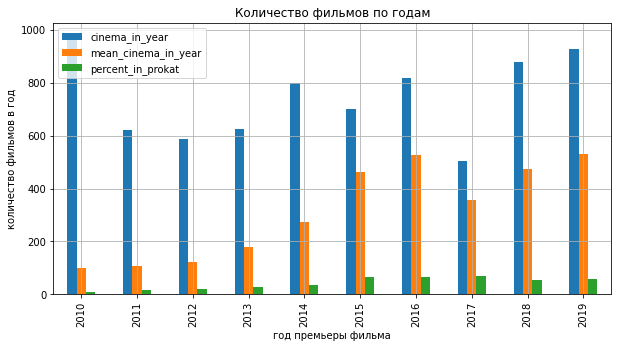

In [102]:
year_box_office.plot(x='year',  
                     kind='bar',
                     figsize = (10, 5),
                     grid = True, 
                     title='Количество фильмов по годам')
plt.xlabel('год премьеры фильма')
plt.ylabel('количество фильмов в год')
plt.show()

В среднем за имеющийся период, прокатные удостоверения получали 744 фильмов ежегодно, из них выходило в кинотеатрах почти в 2 раза меньше - 313 фильмов.

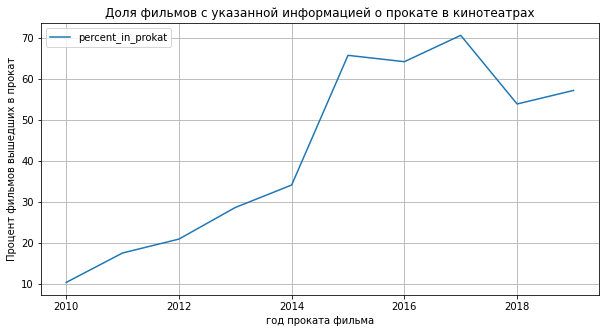

In [103]:
year_box_office.plot(x='year',
                     y='percent_in_prokat',
                     figsize = (10, 5),
                     grid = True,
                     title='Доля фильмов с указанной информацией о прокате в кинотеатрах')
plt.xlabel('год проката фильма')
plt.ylabel('Процент фильмов вышедших в прокат')
plt.show()

Количество фильмов начиная с 2010 года стремительно росло вплоть о 2017 года. скорее всего это связа с новостью:  
В 2017 году индустрия, вовсе не избалованная, но несколько взбудораженная лозунгами предшествующего Года кино, прошла настоящий стресс-тест. Пожалуй, самым обсуждаемым событием 2017 года стал законопроект о введении сбора в 5 млн рублей за прокатное удостоверение вместо обычных 3,5 тысяч рублей. Идея Владимира Мединского заставила поволноваться киносообщество и нависла угрозой для всего рынка. Редко когда эксперты бывали так единодушны в прогнозах и оценках. Призванный, по задумке министра культуры, зачистить кинотеатры от «второсортного» зарубежного кино и получить дополнительные деньги для российского кинопроизводства, законопроект мог бы подорвать, если не уничтожить и без того нестабильный рынок независимого проката. Пишет сайт Kinoagenstvo.ru.

In [104]:
year_box_office.corr()

,year,cinema_in_year,mean_cinema_in_year,percent_in_prokat
year,1.00,0.16,0.91,0.87
cinema_in_year,0.16,1.00,0.31,-0.06
mean_cinema_in_year,0.91,0.31,1.00,0.91
percent_in_prokat,0.87,-0.06,0.91,1.00


Данные о прокате в кинотеатрах не соответствуют общему значению выданных удостоверений, это означает, что часть фильмов получили удостоверение другого типа, не предполагающий кинотеатральный релиз. В среднем за имеющийся период, прокатные удостоверения получали 744 фильмов ежегодно, из них выходило в кинотеатрах почти в 2 раза меньше - 313 фильмов.

В целом, количество фильмов, получающих прокатные удостоверения из года в год не показывает сильной динамики, однако число фильмов, которые предназначены для проката в кинотеатрах растет, достигнув пика 529 фильмов в 2019 году.  

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [105]:
dinamika = data.groupby('year')['box_office'].agg(['sum', 'count', 'mean'])
dinamika = dinamika/1000000
display(dinamika)

,sum,count,mean
year,,,
2010,2.43,0.00,0.02
2011,14.10,0.00,0.13
2012,6.96,0.00,0.06
2013,29.80,0.00,0.17
2014,"7,444.95",0.00,27.27
2015,"39,497.37",0.00,85.49
2016,"47,866.30",0.00,91.17
2017,"48,563.71",0.00,136.03
2018,"49,668.36",0.00,104.79


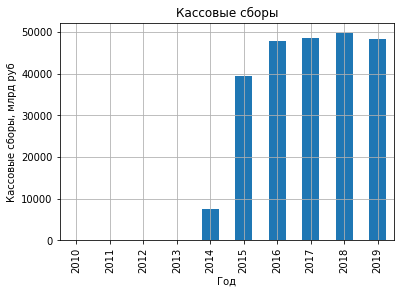

In [106]:
# Посторим  график, зависимости между величиной кассовых сборов и годом:
dinamika['sum'].plot(kind='bar', grid=True)
plt.title('Кассовые сборы')
plt.xlabel('Год')
plt.ylabel('Кассовые сборы, млрд руб')
plt.show()

В 2010 году сумма сборов была минимальной, в 2018 максимальной.

In [107]:
# Посмотрим, какие фильмы собрали максимальные сборы в 2010:
best_film = data.pivot_table(index=['title', 'year'], values='box_office', aggfunc='sum')
best_film.query('year==2010').sort_values(by='box_office', ascending=False).head()

,,box_office
title,year,
Морские динозавры 3D: Путешествие в доисторический мир,2010,"1,446,400.00"
Хаббл 3D,2010,"245,630.00"
Братья .,2010,"168,411.00"
Стоун,2010,"54,060.00"
Три богатыря и Шамаханская царица,2010,"45,225.00"


Видим, что согласно данным в 2010 максимальные сборы имели следующие фильмы:

фильм "Морские динозавры 3D" - сборы составили 1,4 млн руб.  
фильм "Хаббл 3D" - собрано 246 тыс руб.  
фильм "Братья" - сборы составили 168 тыс руб.  
фильм "Стоун" - сбора составили 54 тыс руб.  
фильм "Три богатыря и Шамаханская царица" - собрано всего 45 тыс руб.

- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [108]:
called_money = data.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median'])
display(called_money)

,mean,median
,box_office,box_office
year,,
2010,"24,046.08","1,710.00"
2011,"129,383.17","3,000.00"
2012,"56,548.15","6,220.00"
2013,"166,478.81","3,580.00"
2014,"27,270,885.93","20,400.00"
2015,"85,492,132.46","5,003,450.15"
2016,"91,173,904.27","3,915,041.02"
2017,"136,032,793.33","9,968,340.00"


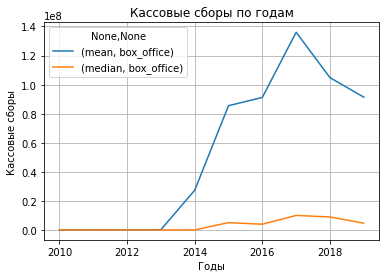

In [109]:
called_money.plot(grid=True)
plt.title('Кассовые сборы по годам')
plt.xlabel('Годы')
plt.ylabel('Кассовые сборы')
plt.show()

Видим, что медиана по кассовым сборам во много раз меньше среднего каждый год. Это свидетельствует о том, что есть некоторое количество фильмов с очень значительными сборами, что повлияло на среднююю величину.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [110]:
more_than_twenty_fifteen = data[data['year'] >= 2015]['year']

In [111]:
data['age_restriction'] = data['age_restriction'].apply(lambda x: x.split('-')[0])

In [112]:
#def age_limit(row):
   # lambda x: ''.row.split('-')
  #  return row[0::]

In [113]:
#age_limites.unique()

In [114]:
(
    data.pivot_table(index=more_than_twenty_fifteen,
                     columns = 'age_restriction',
                     values='box_office')
    .apply (['min', 'max'])   
)

,«0+»,«12+»,«16+»,«18+»,«6+»
min,"3,664,118.26","148,834,713.71","68,072,580.06","41,153,851.27","148,602,567.99"
max,"76,532,976.67","216,170,461.15","154,917,709.92","65,656,432.52","268,580,936.57"


age_restriction
«0+»        809,077,425.97
«12+»    60,619,405,403.33
«16+»    76,034,733,643.63
«18+»    40,759,615,572.12
«6+»     55,798,610,799.68
Name: box_office, dtype: float64

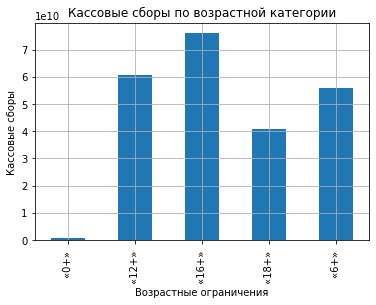

In [115]:
data_restrictions = data.query('year >= 2015').groupby('age_restriction')['box_office'].sum()
display(data_restrictions)
data_restrictions.plot(kind='bar', grid=True)
plt.title('Кассовые сборы по возрастной категории')
plt.xlabel('Возрастные ограничения')
plt.ylabel('Кассовые сборы')
plt.show()

С 2015 по 2019 год самые высокие кассовые сборы были у фильмов с возрастным ограничение 16+, на втором месте 12+, на третьем 6+, на четвертом 18+ и самые маленькие сборы у категории 0+. 

age_restriction
«0+»        379,054,578.37
«12+»    13,616,082,008.91
«16+»    11,368,120,870.27
«18+»     5,432,308,367.44
«6+»      8,701,799,371.41
Name: box_office, dtype: float64

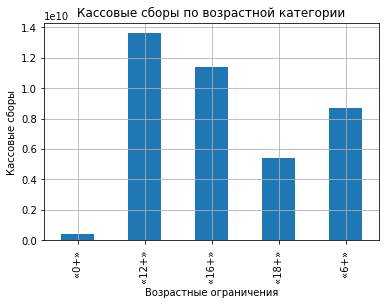

In [116]:
data_restrictions_fifteen = data.query('year == 2015').groupby('age_restriction')['box_office'].sum()
display(data_restrictions_fifteen)
data_restrictions_fifteen.plot(kind='bar', grid=True)
plt.title('Кассовые сборы по возрастной категории')
plt.xlabel('Возрастные ограничения')
plt.ylabel('Кассовые сборы')
plt.show()

В 2015 году самые высокие кассовые сборы были у фильмов с возрастным ограничение 12+.

age_restriction
«0+»        150,228,848.67
«12+»    12,204,446,524.39
«16+»    16,664,548,541.74
«18+»     6,793,929,818.87
«6+»     12,053,146,008.24
Name: box_office, dtype: float64

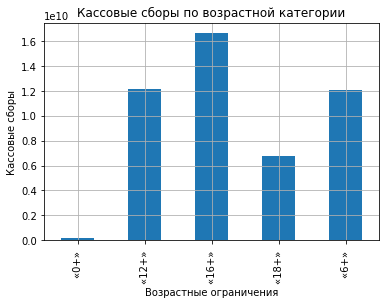

In [117]:
data_restrictions_sixteen = data.query('year == 2016').groupby('age_restriction')['box_office'].sum()
display(data_restrictions_sixteen)
data_restrictions_sixteen.plot(kind='bar', grid=True)
plt.title('Кассовые сборы по возрастной категории')
plt.xlabel('Возрастные ограничения')
plt.ylabel('Кассовые сборы')
plt.show()

В 2016 году самые высокие кассовые сборы были у фильмов с возрастным ограничение 16+, следом идут 12+ и 6+.

age_restriction
«0+»        229,598,930.00
«12+»     7,851,427,660.67
«16+»    18,745,042,900.06
«18+»     9,651,495,581.02
«6+»     12,086,142,145.76
Name: box_office, dtype: float64

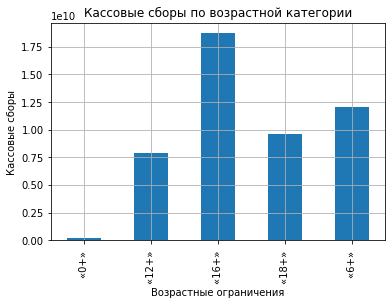

In [118]:
data_restrictions_seventeen = data.query('year == 2017').groupby('age_restriction')['box_office'].sum()
display(data_restrictions_seventeen)
data_restrictions_seventeen.plot(kind='bar', grid=True)
plt.title('Кассовые сборы по возрастной категории')
plt.xlabel('Возрастные ограничения')
plt.ylabel('Кассовые сборы')
plt.show()

В 2017 году самые высокие кассовые сборы были у фильмов с возрастным ограничение 16+.

age_restriction
«0+»         32,449,002.11
«12+»    14,267,250,435.69
«16+»    16,503,602,346.96
«18+»     8,760,085,501.15
«6+»     10,104,974,623.41
Name: box_office, dtype: float64

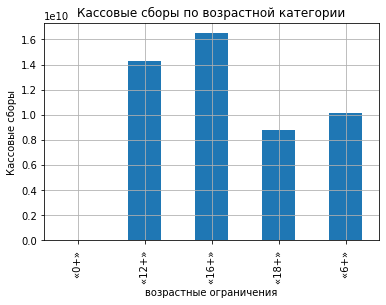

In [119]:
data_restrictions_eighnteen = data.query('year == 2018').groupby('age_restriction')['box_office'].sum()
display(data_restrictions_eighnteen)
data_restrictions_eighnteen.plot(kind='bar', grid=True)
plt.title('Кассовые сборы по возрастной категории')
plt.xlabel('возрастные ограничения')
plt.ylabel('Кассовые сборы')
plt.show()

В 2018 году самые высокие кассовые сборы были у фильмов с возрастным ограничение 16+, не на много отстают фильмы с возрастным ограничение 12+.

age_restriction
«0+»         17,746,066.82
«12+»    12,680,198,773.67
«16+»    12,753,418,984.60
«18+»    10,121,796,303.64
«6+»     12,852,548,650.86
Name: box_office, dtype: float64

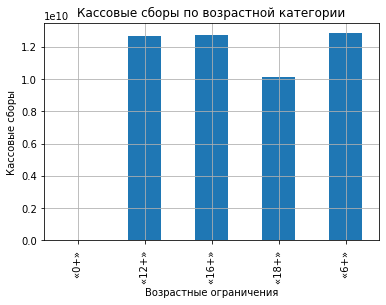

In [120]:
data_restrictions_nineteen = data.query('year == 2019').groupby('age_restriction')['box_office'].sum()
display(data_restrictions_nineteen)
data_restrictions_nineteen.plot(kind='bar', grid=True)
plt.title('Кассовые сборы по возрастной категории')
plt.xlabel('Возрастные ограничения')
plt.ylabel('Кассовые сборы')
plt.show()

age_restriction
«0+»      2,949,626.65
«12+»     5,263,059.25
«16+»     5,604,702.00
«18+»     6,154,439.17
«6+»     13,736,207.98
Name: box_office, dtype: float64

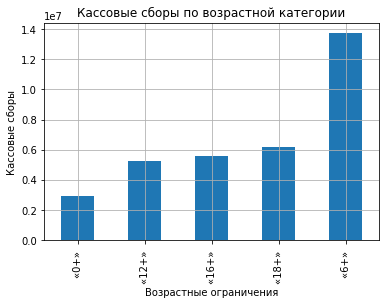

In [121]:
data_restrictions_median = data.query('year >= 2015').groupby('age_restriction')['box_office'].median()
display(data_restrictions_median)
data_restrictions_median.plot(kind='bar', grid=True)
plt.title('Кассовые сборы по возрастной категории')
plt.xlabel('Возрастные ограничения')
plt.ylabel('Кассовые сборы')
plt.show()

Медианное значение кассовых сборов в промежутке с 2015 по 2019г. показывает что в категории 6+ кассовые сборы в 2 раза превышают сборы своего ближайшего преследователя из категории 18+. 12+ и 16+ идут на третьем месте, на пятом месте категоря 0+.  
Иными словами сборы в этой категории стабильно (постоянно) на высоком уровне.

age_restriction
«0+»       8,989,749.18
«12+»    175,200,593.65
«16+»     94,688,335.80
«18+»     51,464,161.08
«6+»     176,020,854.26
Name: box_office, dtype: float64

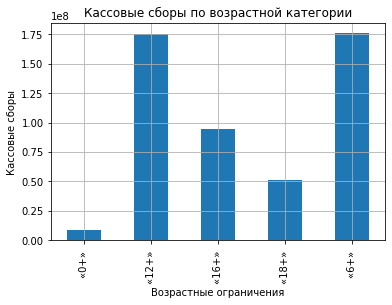

In [122]:
data_restrictions_mean = data.query('year >= 2015').groupby('age_restriction')['box_office'].mean()
display(data_restrictions_mean)
data_restrictions_mean.plot(kind='bar', grid=True)
plt.title('Кассовые сборы по возрастной категории')
plt.xlabel('Возрастные ограничения')
plt.ylabel('Кассовые сборы')
plt.show()

В 2019 сказать о том что есть явный лидер затруднительно, так как фильмы с возрастным оганичением 12+, 16+ и 6+ идут почти вровень, но категоря 6+ все же чуть выше.

За период с 2015-2019 больше всего кассовых сборов собрали фильмы категории 16+, далее идут фильмы категорий 12+ и 6+, затем идут фильмы категории 18+, а фильмы категории 0+ принесли меньше всего выручки.  
Однако, медианное значение показало что стабильно высокую прибыль приносит категория 6+.  
А в среднем значении добавился второй лидер это категория 12+.
- 2015: наибольшие кассовые сборы показали фильмы 12+, затем идут фильмы категории 16+ и 6+.
- 2016: начиная с этого года фильмы категории 16+ будут всегда занимать первое место по кассовым сборам, затем идут фильмы 12+ и 6+ с одинаковыми показателями.
- 2017: фильмы категории 12+ впервые уступили место фильмам 18+.
- 2018: фильмы 12+ заняли второе место, а третье место досталось фильмам категории 6+.
- 2019: почти равномерно распределились фильмы категорий 6+/12+/16+, ненамного отстают от них фильмы 18+.

Можно утверждать, что есть некоторая закономерность между возрастной категорией и кассовыми сборами. Например, фильмы категории 0+ почти не имеют значительных сборов. Также фильмы категории 18+ почти всегда приносят меньше сборов, чем фильмы категорий 6+/12+/16+. Это, вероятно, связано с тем, что их смотрят только совершеннолетние люди, а на фильмы категорий 6+/12+/16+ родители приходят вместе с детьми, или возможно связано с тем, что основной потребитель киноиндустрии это несовершеннолетняя молодежь.

In [ ]:
# Комментарий ревьюера 2
import seaborn as sns
temp = data.copy()
# для удобства укоротим названия категорий
#def get_first_value(s, sep = ','):  # Функция для выбора первого элемента из перечисления
#    value_lst = s.split(sep=sep)
#    return value_lst[0]

#temp['age_restriction'] = temp['age_restriction'].apply(lambda x: get_first_value(x, sep='-'))
# сохраним маску для среза по годам
year_mask = temp['year'] >= 2015

plt.figure(figsize=(8, 8))
(sns.boxplot(data = temp.loc[year_mask], y = 'box_office', x='age_restriction', showfliers=False, showmeans=True)
    .set(title = 'Кассовые сборы в зависимости от возрастной категории', 
         xlabel = 'Возрастные категории', ylabel = 'Кассовый сбор'))
plt.text(0, 3.2e8,'Треугольник показывает среднее значение')
plt.show()

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [123]:
support_data = data[data['budget'].isna() == False].copy()
print(len(support_data))
display(support_data)

332


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,director_main,genre_main,all_support,dolya_goss_support,dolya_refundable,dolya_nonrefundable
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+»,0.00,"26,500,000.00","158,823,800.00",Министерство культуры,8.10,"драма, мелодрама","365,353.60",2013,А.Атанесян,драма,"26,500,000.00",0.17,0.00,0.17
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+»,0.00,"26,000,000.00","74,285,714.00",Министерство культуры,NaN,неизвестно,"28,140.00",2014,А.Якимчук,неизвестно,"26,000,000.00",0.35,0.00,0.35
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+»,0.00,"107,847,945.00","352,046,980.00",Фонд кино,5.30,"комедия, фантастика","19,957,031.50",2013,Р.Давлетьяров,комедия,"107,847,945.00",0.31,0.00,0.31
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+»,0.00,"28,000,000.00","81,148,280.00",Министерство культуры,4.20,драма,"55,917.50",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,"28,000,000.00",0.35,0.00,0.35
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+»,0.00,"25,000,000.00","80,030,244.00",Министерство культуры,6.40,драма,"232,100.00",2014,М.Угаров,драма,"25,000,000.00",0.31,0.00,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7462,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+»,"100,000,000.00","400,000,000.00","1,960,000,000.00",Фонд кино,6.00,"история, биография, драма","717,703,185.53",2019,А.Кравчук,история,"500,000,000.00",0.26,0.05,0.20
7464,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+»,"100,000,000.00",0.00,"380,000,000.00",Фонд кино,6.70,"мультфильм, приключения, семейный","501,069,235.00",2019,Д.Шмидт,мультфильм,"100,000,000.00",0.26,0.26,0.00
7472,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+»,"100,000,000.00","400,000,000.00","1,888,000,000.00",Фонд кино,5.70,"фантастика, боевик",NaN,2019,Ф.Бондарчук,фантастика,"500,000,000.00",0.26,0.05,0.21
7474,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+»,0.00,"30,000,000.00","92,308,000.00",Министерство культуры,5.90,драма,NaN,2019,И.Северов,драма,"30,000,000.00",0.32,0.00,0.32


In [124]:
# Создадим таблицу с данными по фильмам без гос.поддержки:
no_support_data=data.query('nonrefundable_support.isnull() == True')
print('Кол-во прокатных удостоверний у фильмов без гос.поддержки:', len(no_support_data['pu_number']),
        ', Кол-во фильмов без гос.поддержки:', len(no_support_data['title'].unique()))

Кол-во прокатных удостоверний у фильмов без гос.поддержки: 7110 , Кол-во фильмов без гос.поддержки: 6404


In [146]:
# Посчитаем, сколько выделяется средств на поддержку кино за весь период:
display(support_data['total_sup'].describe())
print('Суммарная гос.поддержка за весь период: %.0f' % support_data['total_sup'].sum())

count           332.00
mean     60,845,446.72
std      72,755,459.47
min       3,000,000.00
25%      25,333,750.00
50%      35,000,000.00
75%      60,000,000.00
max     500,000,000.00
Name: total_sup, dtype: float64

Суммарная гос.поддержка за весь период: 20200688312


In [125]:
print('Кол-во прокатных удостоверний у фильмов с гос.поддержкой:', len(support_data['pu_number']))
print('Кол-во уникальных фильмов с гос.поддержкой:', len(support_data['title'].unique()))

Кол-во прокатных удостоверний у фильмов с гос.поддержкой: 332
Кол-во уникальных фильмов с гос.поддержкой: 332


In [126]:
support_data['total_sup'] = support_data['refundable_support'] + support_data['nonrefundable_support']
support_data['profit'] = support_data['box_office'] - support_data['budget']
support_data

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,director_main,genre_main,all_support,dolya_goss_support,dolya_refundable,dolya_nonrefundable,total_sup,profit
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+»,0.00,"26,500,000.00","158,823,800.00",Министерство культуры,8.10,"драма, мелодрама","365,353.60",2013,А.Атанесян,драма,"26,500,000.00",0.17,0.00,0.17,"26,500,000.00","-158,458,446.40"
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+»,0.00,"26,000,000.00","74,285,714.00",Министерство культуры,NaN,неизвестно,"28,140.00",2014,А.Якимчук,неизвестно,"26,000,000.00",0.35,0.00,0.35,"26,000,000.00","-74,257,574.00"
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+»,0.00,"107,847,945.00","352,046,980.00",Фонд кино,5.30,"комедия, фантастика","19,957,031.50",2013,Р.Давлетьяров,комедия,"107,847,945.00",0.31,0.00,0.31,"107,847,945.00","-332,089,948.50"
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+»,0.00,"28,000,000.00","81,148,280.00",Министерство культуры,4.20,драма,"55,917.50",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,"28,000,000.00",0.35,0.00,0.35,"28,000,000.00","-81,092,362.50"
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+»,0.00,"25,000,000.00","80,030,244.00",Министерство культуры,6.40,драма,"232,100.00",2014,М.Угаров,драма,"25,000,000.00",0.31,0.00,0.31,"25,000,000.00","-79,798,144.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7462,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+»,"100,000,000.00","400,000,000.00","1,960,000,000.00",Фонд кино,6.00,"история, биография, драма","717,703,185.53",2019,А.Кравчук,история,"500,000,000.00",0.26,0.05,0.20,"500,000,000.00","-1,242,296,814.47"
7464,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+»,"100,000,000.00",0.00,"380,000,000.00",Фонд кино,6.70,"мультфильм, приключения, семейный","501,069,235.00",2019,Д.Шмидт,мультфильм,"100,000,000.00",0.26,0.26,0.00,"100,000,000.00","121,069,235.00"
7472,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+»,"100,000,000.00","400,000,000.00","1,888,000,000.00",Фонд кино,5.70,"фантастика, боевик",NaN,2019,Ф.Бондарчук,фантастика,"500,000,000.00",0.26,0.05,0.21,"500,000,000.00",NaN
7474,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+»,0.00,"30,000,000.00","92,308,000.00",Министерство культуры,5.90,драма,NaN,2019,И.Северов,драма,"30,000,000.00",0.32,0.00,0.32,"30,000,000.00",NaN


In [127]:
support_data.describe()

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office,year,all_support,dolya_goss_support,dolya_refundable,dolya_nonrefundable,total_sup,profit
count,332.00,332.00,332.00,332.00,316.00,318.00,332.00,332.00,332.00,332.00,332.00,332.00,318.00
mean,"111,593,819.10","11,864,457.83","48,980,988.89","262,844,791.59",6.02,"132,432,420.05","2,016.72","60,845,446.72",0.27,0.04,0.23,"60,845,446.72","-131,581,024.12"
std,"5,703,031.32","24,916,555.26","59,980,117.92","374,296,485.33",1.15,"334,837,856.99",1.64,"72,755,459.47",0.10,0.07,0.11,"72,755,459.47","394,843,048.96"
min,"111,000,115.00",0.00,0.00,"12,000,000.00",1.00,"1,550.00","2,013.00","3,000,000.00",0.02,0.00,0.00,"3,000,000.00","-4,276,551,546.41"
25%,"111,004,891.50",0.00,"25,000,000.00","91,049,599.00",5.30,"1,236,675.50","2,015.00","25,333,750.00",0.19,0.00,0.16,"25,333,750.00","-190,539,611.20"
50%,"111,010,367.00",0.00,"30,000,000.00","142,393,803.00",6.20,"15,720,067.71","2,017.00","35,000,000.00",0.31,0.00,0.24,"35,000,000.00","-98,951,832.02"
75%,"111,017,815.75","15,000,000.00","40,375,000.00","300,000,000.00",6.70,"106,373,008.27","2,018.00","60,000,000.00",0.33,0.06,0.32,"60,000,000.00","-69,208,259.12"
max,"214,010,116.00","180,000,000.00","400,000,000.00","4,610,148,606.00",9.40,"3,073,568,690.79","2,019.00","500,000,000.00",0.50,0.50,0.50,"500,000,000.00","2,753,568,690.79"


In [128]:
print('Суммарная гос.поддержка за весь период: %.0f' % support_data['total_sup'].sum())

Суммарная гос.поддержка за весь период: 20200688312


In [129]:
# Посчитаем, как распределилась гос.поддержка по годам:
support_svod = support_data.groupby('year')['total_sup'].agg(['sum','count'])# 'median'])
support_svod

,sum,count
year,,
2013,"134,347,945.00",2
2014,"572,002,299.00",16
2015,"3,656,241,459.00",86
2016,"4,303,155,482.00",61
2017,"3,183,971,662.00",41
2018,"3,446,969,465.00",56
2019,"4,904,000,000.00",70


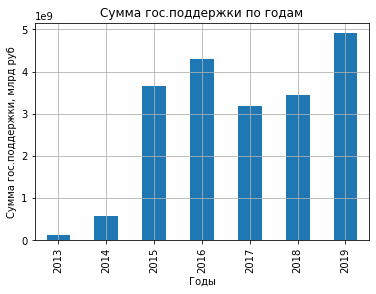

In [130]:
# Посторим  график, отражающий зависимость между величиной гос.поддержки и годом:
support_svod['sum'].plot(kind='bar', grid=True)
plt.title('Сумма гос.поддержки по годам')
plt.xlabel('Годы')
plt.ylabel('Сумма гос.поддержки, млрд руб')
plt.show()

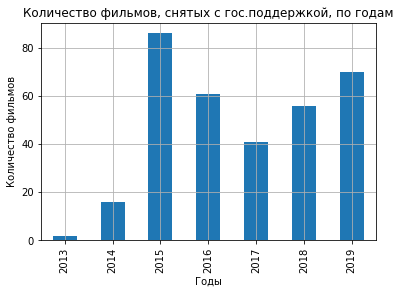

In [131]:
# Посторим  график, отражающий зависимость между количеством фильмов,
# снятых с гос.поддержкой и годом:
support_svod['count'].plot(kind='bar', grid=True)
plt.title('Количество фильмов, снятых с гос.поддержкой, по годам')
plt.xlabel('Годы')
plt.ylabel('Количество фильмов')
plt.show()

In [132]:
# Посторим  график, отражающий зависимость между медианной величиной гос.поддержки и годом:
#support_svod['median'].plot(kind='bar', grid=True)
#plt.title('Медианная сумма гос.поддержки по годам')
#plt.xlabel('Годы')
#plt.ylabel('Медианная сумма гос.поддержки, десятки млн руб')
#plt.show()

In [133]:
# Выведем, фильмы, выпущенные в прокат в 2013 году:
support_data.query('year==2013')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,director_main,genre_main,all_support,dolya_goss_support,dolya_refundable,dolya_nonrefundable,total_sup,profit
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+»,0.00,"26,500,000.00","158,823,800.00",Министерство культуры,8.10,"драма, мелодрама","365,353.60",2013,А.Атанесян,драма,"26,500,000.00",0.17,0.00,0.17,"26,500,000.00","-158,458,446.40"
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+»,0.00,"107,847,945.00","352,046,980.00",Фонд кино,5.30,"комедия, фантастика","19,957,031.50",2013,Р.Давлетьяров,комедия,"107,847,945.00",0.31,0.00,0.31,"107,847,945.00","-332,089,948.50"


year
2013   107,847,945.00
2014    90,000,000.00
2015   250,000,000.00
2016   450,000,000.00
2017   400,000,000.00
2018   260,000,000.00
2019   500,000,000.00
Name: total_sup, dtype: float64

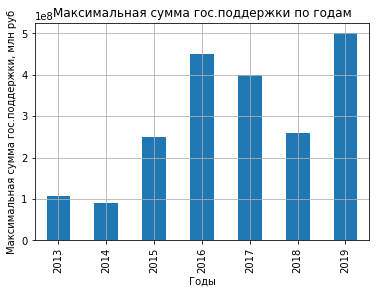

In [134]:
max_support=support_data.groupby('year')['total_sup'].agg('max')
display(max_support)

max_support.plot(kind='bar', grid=True)
plt.title('Максимальная сумма гос.поддержки по годам')
plt.xlabel('Годы')
plt.ylabel('Максимальная сумма гос.поддержки, млн руб')
plt.show()

In [148]:
# Удалим пропущенные значения.
net_support_data=support_data.dropna(subset=['budget', 'box_office'])
# Посчитаем, каков совокупный бюджет фильмов с гос.поддержкой:
print('Суммарный бюджет фильмов с гос.поддержкой за весь период: %.0f' % net_support_data['budget'].sum())
print('Суммарная гос.поддержка за весь период: %.0f' % support_data['total_sup'].sum())

Суммарный бюджет фильмов с гос.поддержкой за весь период: 83956275246
Суммарная гос.поддержка за весь период: 20200688312


In [147]:
# Посчитаем, как распределились бюджеты и кассовые сборы по годам:
net_support_svod = net_support_data.groupby('year')[['box_office', 'budget']].agg(['sum','count', 'median'])
net_support_svod['result','sum'] = net_support_svod['box_office','sum'] - net_support_svod['budget','sum']
net_support_svod

box_office                                budget        \
                   sum count        median               sum count   
year                                                                 
2013     20,322,385.10     2 10,161,192.55    510,870,780.00     2   
2014  1,017,422,166.60    16  5,504,517.85  2,604,969,566.00    16   
2015  5,785,285,418.14    85  9,200,824.50 15,393,340,446.00    85   
2016  6,081,707,839.10    60 17,921,115.61 15,072,473,336.00    60   
2017 10,865,075,300.96    39 50,451,949.00 13,903,145,136.00    39   
2018  9,934,069,010.25    56 27,023,390.31 14,001,328,198.00    56   
2019  8,409,627,454.63    60 25,977,291.30 22,470,147,784.00    60   

                                result  
             median                sum  
year                                    
2013 255,435,390.00    -490,548,394.90  
2014 122,072,883.00  -1,587,547,399.40  
2015 116,156,902.00  -9,608,055,027.86  
2016 139,883,049.00  -8,990,765,496.90  
2017 160,000,000.00  -3,038,069,835.04  
2018 180,649,127.00  -4,067,259,187.75  
2019 181,463,696.00 -14,060,520,329.37

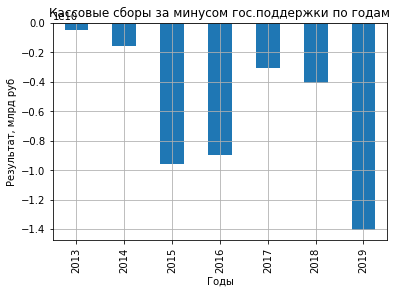

In [137]:
# Посторим  график, отражающий прибыльность фильмов с гос.поддержкой по годам:
net_support_svod['result','sum'].plot(kind='bar', grid=True)
plt.title('Кассовые сборы за минусом гос.поддержки по годам')
plt.xlabel('Годы')
plt.ylabel('Результат, млрд руб')
plt.show()

In [138]:
# Создадим таблицу с данными по фильмам без гос.поддержки:
without_support_data = data.query('nonrefundable_support.isnull() == True')

In [139]:
# Выведем описание рейтинга фильмов с гос.поддержкой:
display(support_data['ratings'].describe())

# Выведем описание рейтинга фильмов БЕЗ гос.поддержки:
without_support_data['ratings'].describe()

count   316.00
mean      6.02
std       1.15
min       1.00
25%       5.30
50%       6.20
75%       6.70
max       9.40
Name: ratings, dtype: float64

count   6,176.00
mean        6.51
std         1.11
min         1.10
25%         5.90
50%         6.60
75%         7.30
max         9.90
Name: ratings, dtype: float64

<AxesSubplot:ylabel='age_restriction'>

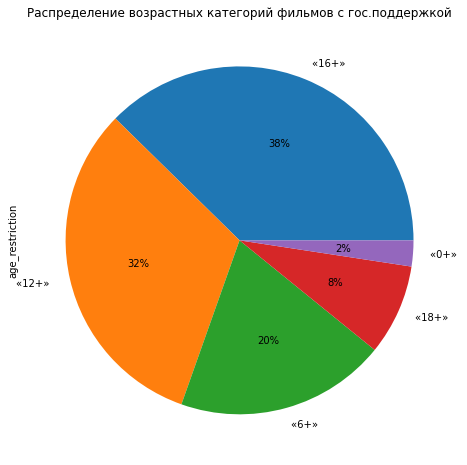

In [140]:
# Посмотрим, для каких возрастных категорий снимают фильмы с гос.поддержкой:
display(support_data['age_restriction'].value_counts()
        .plot(y='count',
              kind='pie',
              autopct='%1.0f%%',
              figsize=(8, 8)))
plt.title('Распределение возрастных категорий фильмов с гос.поддержкой')

support_data['age_restriction'].value_counts().describe()
plt.show()

<AxesSubplot:ylabel='age_restriction'>

count       5.00
mean    1,422.00
std       839.59
min       556.00
25%       801.00
50%     1,470.00
75%     1,573.00
max     2,710.00
Name: age_restriction, dtype: float64

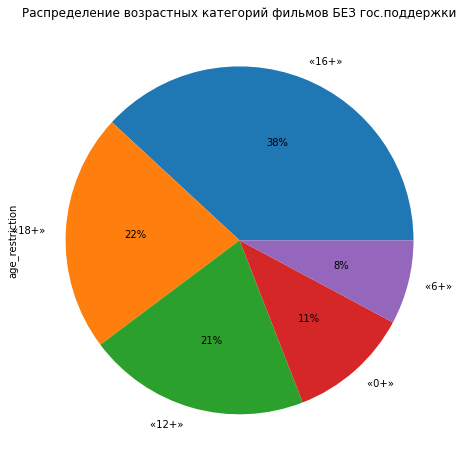

In [141]:
# Посмотрим, для каких возрастных категорий снимают фильмы БЕЗ гос.поддержки:
display(without_support_data['age_restriction'].value_counts()
        .plot(y='count',
              kind='pie',
              autopct='%1.0f%%',
              figsize=(8, 8)))

plt.title('Распределение возрастных категорий фильмов БЕЗ гос.поддержки')
without_support_data['age_restriction'].value_counts().describe()

In [142]:
# Выведем описание рейтинга фильмов с гос.поддержкой:
display(support_data['age_restriction'].value_counts())

# Выведем описание рейтинга фильмов БЕЗ гос.поддержки:
without_support_data['age_restriction'].value_counts()

«16+»     125
«12+»     106
«6+»       65
«18+»      28
«0+»        8
Name: age_restriction, dtype: int64

«16+»     2710
«18+»     1573
«12+»     1470
«0+»       801
«6+»       556
Name: age_restriction, dtype: int64

In [143]:
# Выведем описание рейтинга фильмов с гос.поддержкой:
display(support_data['type'].value_counts())

# Выведем описание рейтинга фильмов БЕЗ гос.поддержки:
without_support_data['type'].value_counts()

Художественный    300
Анимационный       31
Документальный      1
Name: type, dtype: int64

Художественный                5578
Анимационный                   796
Прочие                         406
Документальный                 279
Научно-популярный               50
Музыкально-развлекательный       1
Name: type, dtype: int64

In [144]:
# Выведем имена главных режиссеров, 
# чьи фильмы получили максимальные оценки зрителей, а также их жанры:
(
data.query('ratings > 8')
    .groupby(['director_main','type'])['ratings']
    .count()
    .sort_values(ascending=False)
    .head(10)
)

director_main    type          
Кристофер Нолан  Художественный    8
Питер Джексон    Художественный    7
Л.Гайдай         Художественный    6
Ю.Озеров         Художественный    6
Гай Ричи         Художественный    6
Хаяо Миядзаки    Анимационный      5
Дэвид Йейтс      Художественный    4
Дэвид Финчер     Художественный    4
Люк Бессон       Художественный    3
Роб Минкофф      Анимационный      3
Name: ratings, dtype: int64

Видно что предпочтения отдаются художественным фильмам. А режиссеры Кристофер Нолан и Питер Джексон помимо получения гос.субсидий получают и любовь зрителей, их фильмы оцениваются в среднем выше остальных.


- Количество фильмов, вышедших в прокат за период с 2010-2019, снятых с гос.поддержкой, составляет 332.  
- Всего за период с 2013-2019 была оказана гос.поддержка на сумму 20,2 млрд руб.  
- С 2013 года по 2016 наблюдается рост гос поддержки, в 2017 она снижается до 3 млрд руб. Но в следующих двух годах она вновь растет и набирает рекордную сумму гос поддержки 4.9 млрд руб.  Однако, наибольше количество фильмов получивших гос поддержку было в 2015 году.  
- Меньше всего фильмов с гос.поддержкой вышло в прокат в 2013 году (2 фильма). В 2014 году вышел уже 16 фильм, а в 2015 году вышло больше всего фильмов с гос.поддержкой за весь рассматриваемый период (86 фильмов). В течение следующих двух лет количество вышедших в прокат фильмов с гос.поддержкой снижалось и в 2017 составило всего 41 фильм. После чего наблюдался стабильный рост количества фильмов с гос.поддержкой – так к 2019 году было выпущено в прокат 70 фильмов.  
- На 1 фильм в 2013 году в среднем было потрачено 67 млн руб гос.поддержки. Однако уже в следующем году в среднем размер гос.поддержки одного фильма составил в 2 раза меньше – всего 35 млн руб. Объем гос.поддержки на 1 фильм в 2015г - 42. Объем гос.поддержки на 1 фильм в 2016г - 70млн руб. Объем гос.поддержки на 1 фильм в 2017г - 77млн руб. Объем гос.поддержки на 1 фильм в 2018г - 61млн руб. Объем гос.поддержки на 1 фильм в 2019г - 70млн руб.
- Фильмы без гос поддержи ни в один год себя не окупили. Максимальный убыток получили фильмы в 2019 году - минус 14 млрд руб.  
- 38% фильмов с гос поддержкой приходятся на категорию 16+, следум идет категория 12+ - 32%, 6+ - 20%, 18+ - 8, 0+ - 2%.  
- А в фильмах без гос поддержки распределение идет  так что на категорию 16+ приходится 38%, на категорию 18+ - 22%, 12+ - 21%,  0+ - 11%, 6+ - 8%.


### Шаг 5. Напишите общий вывод

- В столбце genres 963 данных отсутствует, в столбце producer отсутствует 567 данных мы не стали их удалять так как они повлияли бы на дальнейшее исследование.  
- Есть строки с нулевыми кассовыми сборами, но с хорошими рейтингами. Можно предположить, что эти фильмы по тем или иным причинам не показали в назначеное время, по причине технических неисправностей или же каких то других проблем, а рейтинг самого фильма сформировался при других просмотрах, домашних к примеру, избавились от этих строк.  
- В refundable_support, nonrefundable_support, financing_source:только у 4% фильмов есть информация об источнике государственного финансирования и объёмах возвратных и невозвратных средств государственной поддержки. Получается, что данные фильмы не были профинансированы государством. Количество пропущенных значений одинаковы по данным столбцам, поэтому пропуски трогать  не стали.  
- В ratings для 967 фильмов рейтинги не указаны - ,возможно, для формирования рейтинга на Кинопоиске недостаточно оценок у фильмов.  
- box_office: 4309 записи о кассовых сборах не заполнены и 24 сбора нулевых.О нулевых сборах можно предположить, что эти фильмы по тем или иным причинам не показали в назначеное время, по причине технических неисправностей или же каких то других проблем, а рейтинг самого фильма сформировался при других просмотрах, домашних к примеру. Все же избавились от них чтобы они не вводили в заблуждение, их немного и они не повлияют на дальнейшее исследование. В таблице movies после удаления неявного дубликата оставалось 7485 значений, в таблице shows 3158 значений, после объединения получилось 7485-3158=4327 не заполненных строк, то есть все имеющиеся строки в таблице shows мы использовали, других данных у нас нет, оставим пропуски.  
- Столбцы: страна происхождения, режиссер, продюссер, жанр, содержат множественные значения строк, в которых рекомендуют считать, что первое указанное значение и есть "главный" показатель. Мы создали дополнительные столбцы с именем и фамилией главного режиссёра и основным жанром фильма исходя из первого значения строки. Определение главного продюссера фильмов в данном случае, не представляет ценности для исследования, в основном их количество разнится от 1-3, и выделить из их числа того или иного создателя будет некорректным.  
- Существуют фильмы с нулевым бюджетом, но при этом они получили возвратные и/или невозвратные средств государственной поддержки, такая ситуация странная, поэтому будем считать, что общий бюджет в таких ситуациях равен сумме двух этих величин, умноженной на 2. Согласно, статьи "Обстоятельное объяснение, как государство поддерживает кино в России" на Кинопоиске, мы можем узнать, что максимально возможная компенсация, составляет 70% бюджета, такую поддержку получают не все фильмы, поэтому для исследования примем, что собственные и привлеченные средства равны. Так же видно что есть аномально маленькие сборы.  
- Оказалось, что 6,6% положительных значений сборов в рублях, находятся в промежутке до 1000 рублей, что вызывает сомнения. Это может быть связано с повторным прокатом, который провалился, либо с неверно поставленной запятой.  
- Медианная величина бюджета фильма с государственной поддержкой составляет примерно 73 млн руб, в то время как средняя величина составляет 134 млн руб.Это свидетельствует о том, что есть некоторые фильмы, снятые с гос.поддержкой, с очень значительным бюджетом. Их бюджет повлиял на среднюю величину, но не затронул значение медианного бюджета.  
- В среднем за имеющийся период, прокатные удостоверения получали 744 фильмов ежегодно, из них выходило в кинотеатрах почти в 2 раза меньше - 313 фильмов.  
- Количество фильмов начиная с 2010 года стремительно росло вплоть до 2017 года. скорее всего это связано с новостью:
- "В 2017 году индустрия, вовсе не избалованная, но несколько взбудораженная лозунгами предшествующего Года кино, прошла настоящий стресс-тест. Пожалуй, самым обсуждаемым событием 2017 года стал законопроект о введении сбора в 5 млн рублей за прокатное удостоверение вместо обычных 3,5 тысяч рублей. Идея Владимира Мединского заставила поволноваться киносообщество и нависла угрозой для всего рынка. Редко когда эксперты бывали так единодушны в прогнозах и оценках. Призванный, по задумке министра культуры, зачистить кинотеатры от «второсортного» зарубежного кино и получить дополнительные деньги для российского кинопроизводства, законопроект мог бы подорвать, если не уничтожить и без того нестабильный рынок независимого проката." Пишет сайт Kinoagenstvo.ru.  
- В 2010 году сумма сборов была минимальной, в 2018 максимальной.
- Количество фильмов, вышедших в прокат за период с 2010-2019, снятых с гос.поддержкой, составляет 332. Причем, каждому фильму с гос.поддержкой было выдано только одно прокатное удостоверение, в отличие от остальных фильмов, где в среднем каждому 10-му фильму выдавалось по 2 удостоверения.  
- Меньше всего фильмов с гос.поддержкой вышло в прокат в 2013 году - 2 фильма. В 2014 году вышел уже - 15 фильмов, а в 2015 году вышло больше всего фильмов с гос.поддержкой за весь рассматриваемый период 80 фильмов. В течение следующих двух лет количество вышедших в прокат фильмов с гос.поддержкой снижалось и в 2017 составило всего 39 фильм, 2018 - 52 фильма. После чего наблюдался стабильный рост количества фильмов с гос.поддержкой – так к 2019 году было выпущено в прокат 79 фильмов.  
- максимальный объем гос.поддержки был предоставлен не в 2015 году (когда было выпущено максимальное количество фильмов с гос.поддержкой), а в 2019 году – 5 млрд руб;
- на втором месте по объему гос.поддержки за год занимает 2016 – 4,5 млрд руб;
- на третьем месте по объему гос.поддержки находится 2017 год – 4,0 млрд руб.
- На 1 фильм в 2013 году в среднем было потрачено 67 млн руб гос.поддержки. Однако уже в следующем году в среднем размер гос.поддержки одного фильма составил в 2 раза меньше – всего 35 млн руб. Объем гос.поддержки на 1 фильм в 2015г - 42. Объем гос.поддержки на 1 фильм в 2016г - 70млн руб. Объем гос.поддержки на 1 фильм в 2017г - 77млн руб. Объем гос.поддержки на 1 фильм в 2018г - 61млн руб. Объем гос.поддержки на 1 фильм в 2019г - 70млн руб.
- В 2013 году максимальная гос.поддержка фильма составляла 107 млн руб. На следующий год объем гос.поддержки фильма снизился до 90 млн руб, однако начиная с этого времени объем максимальной гос.поддержки стабильно увеличивался и в 2016 году составил уже 450 млн руб. Затем в течение двух лет наблюдается снижение максимальной гос.поддерки до 260 млн руб. Но уже в 2019 году фильм получил максимальную сумму гос.поддержки за весь период – 500 млн руб.  

ОКУПАЕМОСТЬ ФИЛЬМОВ С ГОС.ПОДДЕРЖКИ

- За весь рассматриваемый период лишь в 2017 и в 2018 годах фильмы с гос.поддержкой себя окупили 

РЕЙТИНГ ФИЛЬМОВ С ГОС.ПОДДЕРЖКОЙ

- Медианное значение рейтинга по фильмам с гос.поддержкой составляет 6,0, что на 0,5 меньше рейтинга фильмов без гос.поддержки. Фильмы с гос.поддержкой самую большую оценку получили в 9,4 балла в то время, как прочие фильмы получали оценки до 9,9. Таким образом, можно сделать вывод о том, что фильмы, снятые без участия государства, пользуются большей любовью у зрителей, чем фильмы, снятые с гос.поддержкой.  

ВОЗРАСТНАЯ КАТЕГОРИЯ ФИЛЬМОВ С ГОС.ПОДДЕРЖКОЙ

- Самая распространенная возрастная категория как среди фильмов с гос.поддержкой так и без неё – это категория 16+.

- Второе месте среди фильмов с гос.поддержкой принадлежит фильмам категории 12+. У фильмов, снятых без гос.поддержки, категория 12+ уступает место фильмам 18+.

- На третьем месте среди фильмов с гос.поддержкой находится категория 6+. Однако среди фильмов, снятых без гос.поддержки фильмы 6+ находятся на самом последнем месте.  

ЖАНРЫ ФИЛЬМОВ С ГОС.ПОДДЕРЖКОЙ

- Фильмы, снятые с гос.поддержкой не отличаются разнообразием жанров:

- 90% всех фильмов с гос.поддержкой представляют собой художественные фильмы, оставшиеся 10% фильмов это мультфильмы. 

_ВЫВОД_  

_Количество фильмов, снятых с участием государства составляет около 5% от всех фильмов, выпущенных в прокат за весь рассматриваемый период. Преимущественно, субсидируемые фильмы себя не окупают. Фильмы, снятые без участия государства, пользуются большей любовью у зрителей, чем фильмы, снятые с государственной поддержкой._  

_Наблюдается некоторая закономерность между возрастной категорией и кассовыми сборами. Например, фильмы категории 0+ почти не имеют значительных сборов. Также фильмы категории 18+ почти всегда приносят меньше сборов, чем фильмы категорий 6+/12+/16+. Это, вероятно, связано с тем, что их смотрят только совершеннолетние люди, а на фильмы категорий 6+/12+/16+ родители приходят вместе с детьми, или возможно связано с тем, что основной потребитель киноиндустрии представляет собой несовершеннолетнюю молодежь._  

_Самая распространенная возрастная категория как среди фильмов с гос.поддержкой так и без неё – это категория 16+._